## Import Libraries


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import bz2
import re




## Read dataset(test & train)

In [8]:
train_file = bz2.BZ2File('train.ft.txt.bz2')
test_file = bz2.BZ2File('test.ft.txt.bz2')


In [19]:
with bz2.BZ2File('train.ft.txt.bz2', 'r') as bz:
     lines = []
     for i, line in enumerate(bz):
        if i == 100: break
        lines.append(line.rstrip())

print(lines[30])
    

b'__label__1 Incorrect disc!: I am a big JVC fan, but I do not like this model, I was suspiscious when I saw several units in the return section of the store. I bought one anyway (new) and must say I am not happy. The unit sends out clicks to the receiver once in a while, the transition between scenes is not always smooth,(like a little pause) and while it is still fairly new I can\'t get any DVD,CD or even a DVD headcleaner to work. All I get is a "incorrect disc" message.'



## Convert to text & labels


In [5]:
def text_label(file):
    texts = []
    labels = []
    for line in file:
        b = line.decode('utf-8') #decode binary to string
        labels.append(int(b[9])-1) #get labels
        texts.append(b[10:].strip()) #get texts
        
    print('labels and text were extracted')        
    return  np.array(labels), texts  

In [20]:
train_labels, train_texts = text_label(train_file)
test_labels, test_texts = text_label(test_file)

labels and text were extracted
labels and text were extracted


In [21]:
train_texts[0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

## Data Cleaning 

In [25]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fatemeh98/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
def clean_texts(texts):
    stopw = stopwords.words('english')
    l = len(texts)/10
    temp_texts = []
    for i in range(len(texts)):
        text = re.sub('\d','0',texts[i])
        if 'www.' in text \
        or 'http:' in text \
        or 'https:' in text \
        or '.com' in text: 
             text = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", " ", text)
                
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = text.split()  
        text = [word for word in text if not word in stopw]
        text = ' '.join(text)
        temp_texts.append(text)
        
        if i%l==0:
            print('--'+str(int(i/l)*10)+'%', end='')
    print('--100%--Done !')
    return temp_texts
        
        

In [28]:
print('Processing Training data')
train_texts = clean_texts(train_texts)
print('\nProcessing Test data')
test_texts = clean_texts(test_texts)

Processing Training data
--0%--10%--20%--30%--40%--50%--60%--70%--80%--90%--100%--Done !

Processing Test data
--0%--10%--20%--30%--40%--50%--60%--70%--80%--90%--100%--Done !


In [30]:
train_texts[0]

'stuning even non gamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen'

<AxesSubplot:ylabel='count'>

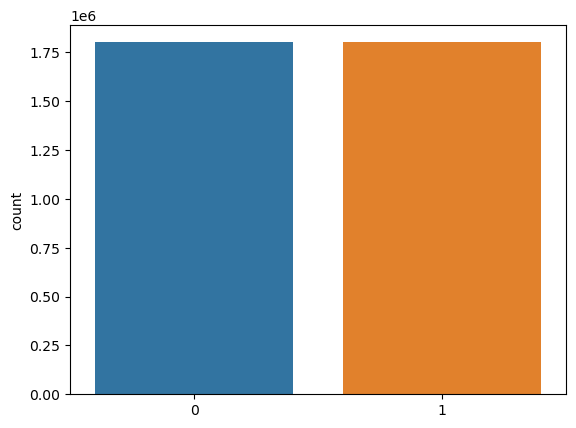

In [31]:
sns.countplot(x = train_labels)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

print('Fitting data...')
count_vect = CountVectorizer()
count_vect.fit(train_texts) ; print('fit complete !')

print('tranforming training set...')
train_texts_vec = count_vect.transform(train_texts)

print('tranforming test set...')
test_texts_vec = count_vect.transform(test_texts)

Fitting data...
fit complete !
tranforming training set...
tranforming test set...


## Train Model Naive Bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_texts_vec, train_labels)


MultinomialNB()

In [34]:
predict = nb.predict(test_texts_vec)

## Accuracy

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(test_labels, predict))

Accuracy: 0.8491875


In [ ]:
sample = test_texts[102]
print(sample)

sample_vec = count_vect.transform([sample])
print(f'prediction:{nb.predict(sample_vec)[0]}')
print('actual label:', test_labels[102])

## Logistic Regression Model

In [2]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(n_jobs=-1, max_iter=150)
lr_model.fit(train_texts_vec, train_labels)

NameError: name 'train_texts_vec' is not defined